In [11]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi

In [127]:
AO_length = 125
L0 = 280
vindinger = 43
trådiameter = 4
ytrediameter = 30.5
nominelldiameter = ytrediameter-trådiameter
elastitesmodul = 210000
v = 0.3
skjærmodul = elastitesmodul/(2*(1+v)) 
k = (skjærmodul*trådiameter**4)/(8*43*nominelldiameter**3)
print(f"k = {k:.2f} N/mm")

k = 3.23 N/mm


![Alt text](figures/definitions.jpeg "Optional title")


In [129]:
theta_deg = np.arange(0,360)
theta_rad = theta_deg*2*pi/360
#print(thetadeg*2*pi/360)

In [133]:
AO = np.column_stack((-125 * np.cos(theta_rad), -125 * np.sin(theta_rad), np.zeros(360)))
DO = np.array([274, -440, 0])
DA = DO - AO

DA_length = np.linalg.norm(DA, axis=1)
DA_angle_rad = np.arctan2(DA[:, 1], DA[:, 0])
DA_angle_deg = np.rad2deg(DA_angle_rad)
BAangD_rad = theta_rad - DA_angle_rad
BAangD_deg = np.rad2deg(BAangD_rad)

x_length = DA_length - L0
fjærkraft = k*x_length
fjærkraft_vinkelrett_AB = fjærkraft*np.sin(BAangD_rad)

M_om_O_fra_fjærkraft = fjærkraft_vinkelrett_AB*AO_length

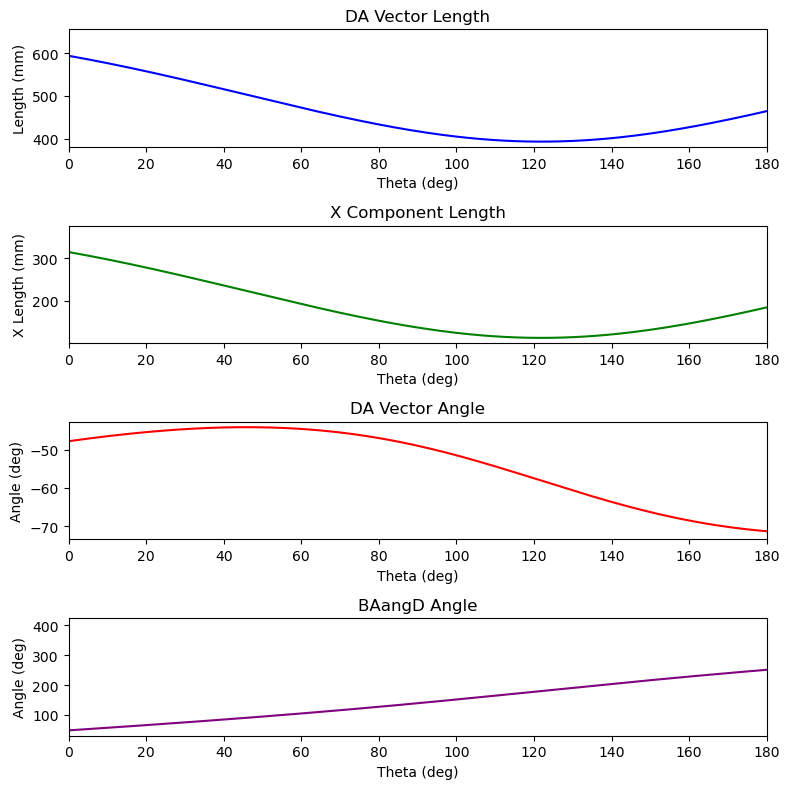

In [147]:
maxTheta = 180
fig, ax = plt.subplots(4, figsize=(8, 8))

# First subplot: DA Length
ax[0].plot(DA_length, color='blue')
ax[0].set_xlim(0, maxTheta)
ax[0].set_title('DA Vector Length')
ax[0].set_xlabel('Theta (deg)')
ax[0].set_ylabel('Length (mm)')

# Second subplot: x_length (assuming x_length is defined)
ax[1].plot(x_length, color='green')
ax[1].set_xlim(0, maxTheta)
ax[1].set_title('X Component Length')
ax[1].set_xlabel('Theta (deg)')
ax[1].set_ylabel('X Length (mm)')

# Third subplot: DA Angle in degrees
ax[2].plot(DA_angle_deg, color='red')
ax[2].set_xlim(0, maxTheta)
ax[2].set_title('DA Vector Angle')
ax[2].set_xlabel('Theta (deg)')
ax[2].set_ylabel('Angle (deg)')

# Fourth subplot: BAangD_deg (assuming BAangD_deg is defined)
ax[3].plot(BAangD_deg, color='purple')
ax[3].set_xlim(0, maxTheta)
ax[3].set_title('BAangD Angle')
ax[3].set_xlabel('Theta (deg)')
ax[3].set_ylabel('Angle (deg)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


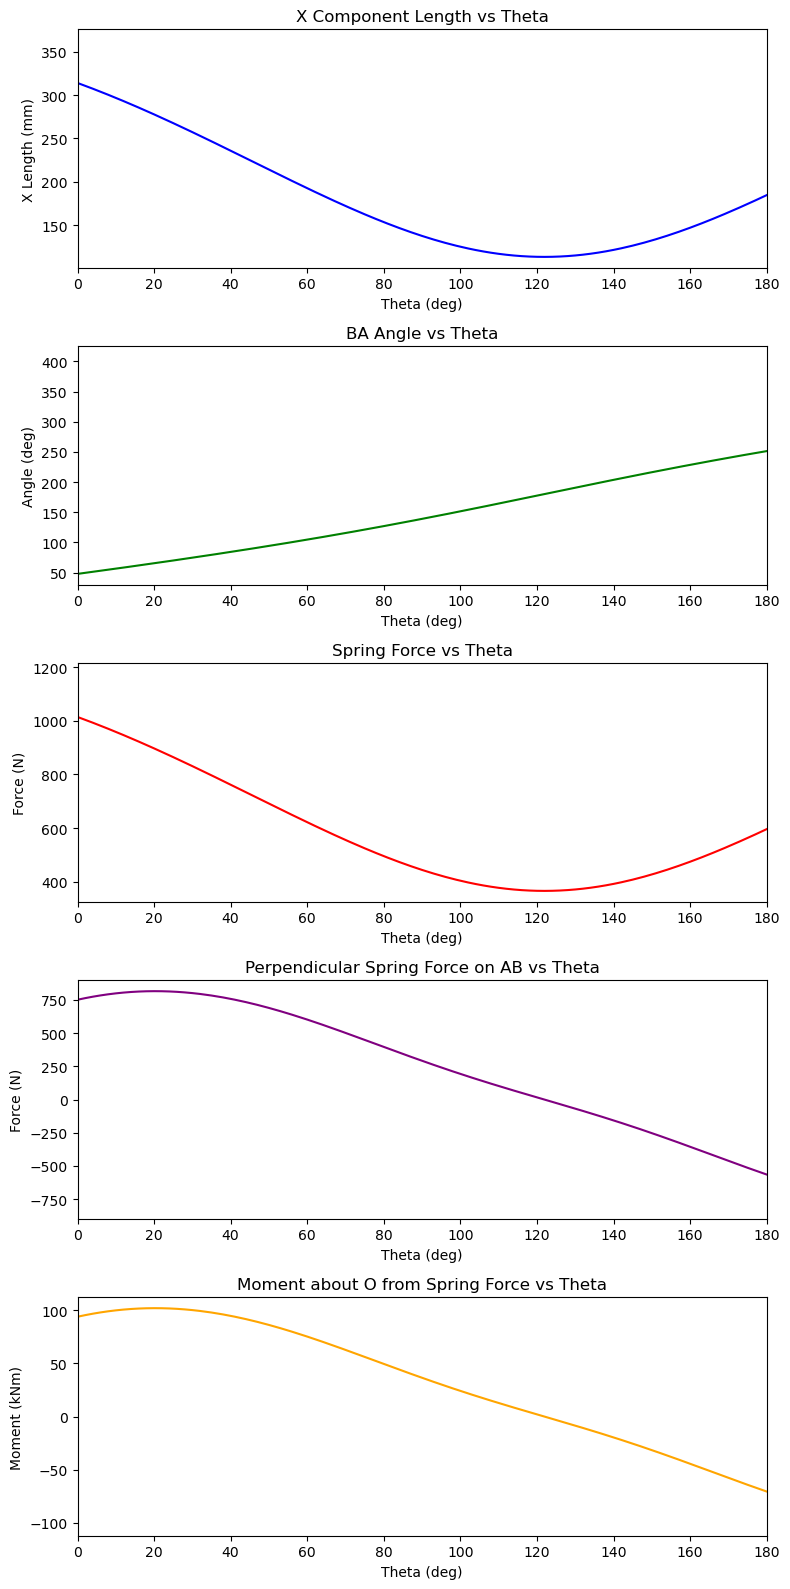

In [153]:
maxTheta = 180
fig, ax = plt.subplots(5, figsize=(8, 16))

# First subplot: X Component Length
ax[0].plot(x_length, color='blue')
ax[0].set_xlim(0, maxTheta)
ax[0].set_title('X Component Length vs Theta')
ax[0].set_xlabel('Theta (deg)')
ax[0].set_ylabel('X Length (mm)')

# Second subplot: BA Angle in degrees
ax[1].plot(BAangD_deg, color='green')
ax[1].set_xlim(0, maxTheta)
ax[1].set_title('BA Angle vs Theta')
ax[1].set_xlabel('Theta (deg)')
ax[1].set_ylabel('Angle (deg)')

# Third subplot: Spring Force (fjærkraft)
ax[2].plot(fjærkraft, color='red')
ax[2].set_xlim(0, maxTheta)
ax[2].set_title('Spring Force vs Theta')
ax[2].set_xlabel('Theta (deg)')
ax[2].set_ylabel('Force (N)')

# Fourth subplot: Perpendicular Spring Force on AB (fjærkraft_vinkelrett_AB)
ax[3].plot(fjærkraft_vinkelrett_AB, color='purple')
ax[3].set_xlim(0, maxTheta)
ax[3].set_title('Perpendicular Spring Force on AB vs Theta')
ax[3].set_xlabel('Theta (deg)')
ax[3].set_ylabel('Force (N)')

# Fifth subplot: Moment about O from Spring Force (M_om_O_fra_fjærkraft/1000)
ax[4].plot(M_om_O_fra_fjærkraft/1000, color='orange')
ax[4].set_xlim(0, maxTheta)
ax[4].set_title('Moment about O from Spring Force vs Theta')
ax[4].set_xlabel('Theta (deg)')
ax[4].set_ylabel('Moment (kNm)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()
